In [1]:
using OrdinaryDiffEq, ParameterizedFunctions
using Plots, LaTeXStrings

# Viral kinetic model

*Smith, A. P., Moquin, D. J., Bernhauerova, V., & Smith, A. M. (2018). Influenza virus infection model with density dependence supports biphasic viral decay. Frontiers in Microbiology, 9(JUL), 1–10. https://doi.org/10.3389/fmicb.2018.01554*

The standard kinetic model with varying clearance rate reads
$$
\begin{aligned}
\frac{dT}{dt} & = -\beta T V, \\
\frac{dI_1}{dt} & = \beta T V - k I_1, \\
\frac{dI_2}{dt} & = k I_1 - \frac{\delta I_2}{K + I_2}, \\
\frac{dV}{dt} & = p I_2 -c V.
\end{aligned}
$$

### Model

In [2]:
viral_target = @ode_def begin
    dT = -β*T*V
    dI₁ = β*T*V - k*I₁
    dI₂ = k*I₁ - δ*I₂/(K + I₂)
    dV = p*I₂ - c*V
end β k δ K p c

(::var"##253"{var"###ParameterizedDiffEqFunction#350",var"###ParameterizedTGradFunction#351",var"###ParameterizedJacobianFunction#352",Nothing,Nothing,ODESystem}) (generic function with 1 method)

### ODE Problem and solution

In [3]:
u0 = [1e+7, 75.0, 0.0, 1e-10]
tspan = (0.0, 12.0)
pars = (β = 2.4e-4,
        k = 4.0,
        δ = 1.6e+6,
        K = 4.5e+5,
        p = 1.6,
        c = 13.0)
prob = ODEProblem(viral_target, u0, tspan, pars)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 12.0)
u0: [1.0e7, 75.0, 0.0, 1.0e-10]

In [4]:
sol = solve(prob, Tsit5());

### Plotting the solution and virus load

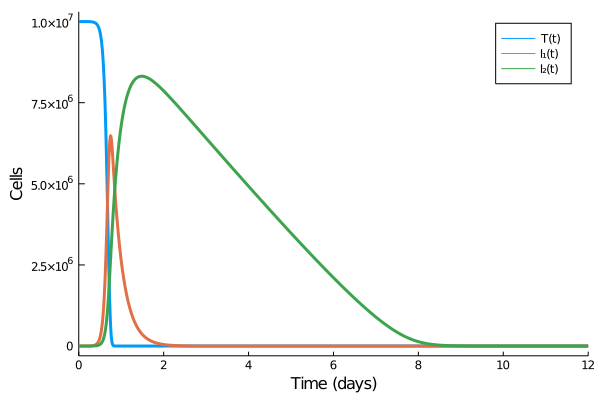

In [5]:
plot(sol, vars=(1:3), lw=3, xlabel="Time (days)", ylabel="Cells", grid=:off)

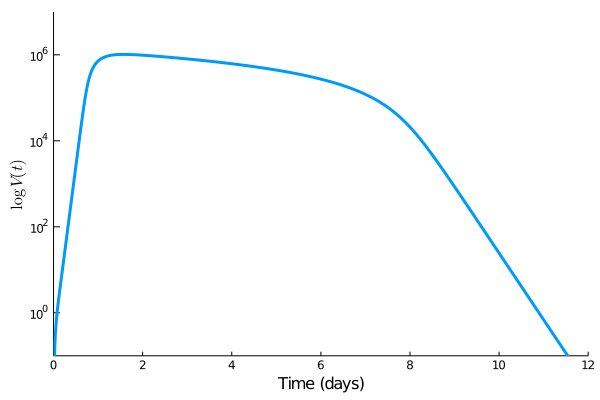

In [6]:
plot(sol, vars=(4), lw=3, legend=:none, grid=:none,
    xaxis = ("Time (days)", (0, 12)),
    yaxis = (L"$\log\, V(t)$", (1e-1, 1e+7), :log10))